<a href="https://colab.research.google.com/github/nurkausarmuner-enka/dl-assignment-01-numpy-neural-network/blob/main/C_two_layer_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Muner Nurkaussar
# C. NumPy
import numpy as np

In [50]:
# dataset
X = np.array([
    [20, 3, 4],
    [15, 5, 3],
    [30, 2, 2],
    [25, 4, 1],
    [35, 2, 3]
])
# target
y = np.array([
    [18],
    [20],
    [22],
    [25],
    [30]
])

In [51]:
# scaling data
X_scaled = X / np.max(X, axis=0)
y_scaled = y / 40

In [52]:
input_size = 3
hidden_size = 3
output_size = 1
learning_rate = 0.1
epochs = 10000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [53]:
# activation functions
def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return x * (1 - x)

In [54]:
# training loop
losses = []

for i in range(epochs):
    # forward prop
    z1 = np.dot(X_scaled, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # loss
    loss = np.mean((a2 - y_scaled)**2)
    losses.append(loss)

    # backward prop
    dz2 = (a2 - y_scaled) * sigmoid_deriv(a2)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, W2.T) * relu_deriv(a1)
    dW1 = np.dot(X_scaled.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Gradient Descent Update
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

In [55]:
# final deliverables
final_predictions = a2 * 40
print("--- Final Learned Weights & Biases ---")
print(f"W1:\n{W1}\nb1: {b1}")
print(f"W2:\n{W2}\nb2: {b2}\n")

print("--- Predictions vs Actual ---")
for i in range(len(y)):
    print(f"Input {i+1}: Actual={y[i][0]}, Predicted={final_predictions[i][0]:.2f}")

--- Final Learned Weights & Biases ---
W1:
[[ 0.63690979 -1.26470442  0.58299203]
 [ 1.5916743   0.36695723 -0.73348215]
 [ 1.61265897  1.4105663  -1.17286964]]
b1: [[-0.62228661  0.05952895  0.59017637]]
W2:
[[ 1.0803964 ]
 [-1.80887873]
 [-1.45669731]]
b2: [[-0.94313257]]

--- Predictions vs Actual ---
Input 1: Actual=18, Predicted=18.01
Input 2: Actual=20, Predicted=20.00
Input 3: Actual=22, Predicted=22.26
Input 4: Actual=25, Predicted=24.93
Input 5: Actual=30, Predicted=29.76


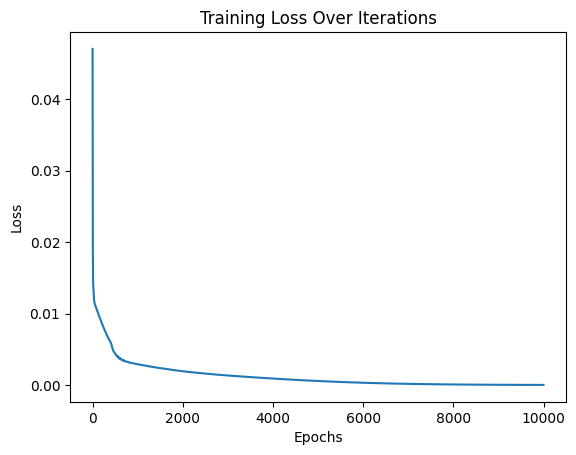

In [56]:
# plot
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training Loss Over Iterations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()